<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/%E5%8A%B9%E6%9E%9C%E6%A4%9C%E8%A8%BC%E5%85%A5%E9%96%80_2_3%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%82%92%E5%88%A9%E7%94%A8%E3%81%97%E3%81%9F%E6%8E%A2%E7%B4%A2%E7%9A%84%E3%81%AA%E5%8A%B9%E6%9E%9C%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


書籍「効果検証入門」の写経です。  
環境：GoogleColab  
言語：R  

割引券の特徴  
・学費の半額補助(当選グループの通学率アップ期待)  
・落第による効果消滅(留年減少期待)  

#2.3.2 回帰分析の実行

In [ ]:
# (1) 利用するデータを持つライブラリのインストール（初回のみ）
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("itamarcaspi/experimentdatar")

Skipping install of 'experimentdatar' from a github remote, the SHA1 (f71a9d07) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
# (2) ライブラリとデータの読み込み
library("experimentdatar")
library("broom")
library("tidyverse")
data(vouchers)
vouchers

ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,⋯,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,0,0,0,NA,NA,NA,NA,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,0,0,0,1,NA,12,NA,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,0,0,0,0,NA,13,NA,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,0,0,0,14,12,0,8,1,⋯,0,0,1,1,1,0,1,0,1,0
4,1,0,0,1,14,12,0,8,1,⋯,0,0,1,1,1,0,1,0,1,0
5,1,0,0,0,14,12,0,8,1,⋯,0,0,1,1,1,0,0,0,1,0
6,1,0,0,0,12,10,0,7,1,⋯,1,1,1,1,0,0,0,0,1,0
7,0,0,0,1,NA,13,NA,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,0,0,0,1,NA,12,NA,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# (3) Angrist(2002)のTable 3. bogota 1995の再現
## 回帰式の準備
### 回帰式で使う文字列の準備
formula_x_base <- "VOUCH0"
formula_x_covariate <- "SVY + HSVISIT + AGE + STRATA1 + STRATA2 + STRATA3 + STRATA4 + STRATA5 + STRATA6 + STRATAMS + D1993 + D1995 + D1997 + DMONTH1 + DMONTH2 + DMONTH3 + DMONTH4 + DMONTH5 + DMONTH6 + DMONTH7 + DMONTH8 + DMONTH9 + DMONTH10 + DMONTH11 + DMONTH12 + SEX2"
formula_y <- c("TOTSCYRS","INSCHL","PRSCH_C","USNGSCH","PRSCHA_1","FINISH6","FINISH7","FINISH8","REPT6","REPT","NREPT",
               "MARRIED","HASCHILD","HOURSUM","WORKING3")

### formula_yの各要素に対して共変量を含まない回帰式を作成
base_reg_formula <- paste(formula_y, "~", formula_x_base)
names(base_reg_formula) <- paste(formula_y, "base", sep = "_")

### formula_yの各要素に対して共変量を含む回帰式を作成
covariate_reg_formula <-
  paste(formula_y, "~", formula_x_base, "+", formula_x_covariate)
names(covariate_reg_formula) <-
  paste(formula_y, "covariate", sep = "_")

### モデル式のベクトルを作成
table3_fomula <- c(base_reg_formula, covariate_reg_formula)

### モデル式のベクトルをデータフレーム化する
models <- table3_fomula %>%
  enframe(name = "model_index", value = "formula")

## 回帰分析を実行
### bogota 1995のデータを抽出する
regression_data <- vouchers %>% filter(TAB3SMPL == 1, BOG95SMP == 1)

### まとめて回帰分析を実行
df_models <- models %>%
  mutate(model = map(.x = formula,
                     .f = lm,
                     data = regression_data)) %>%
  mutate(lm_result = map(.x = model, .f = tidy))

### モデルの結果を整形
df_results <- df_models %>%
  mutate(formula = as.character(formula)) %>%
  select(formula, model_index, lm_result) %>%
  unnest(cols = c(lm_result))

#2.3.3 私立学校への通学と割引券の利用についての分析

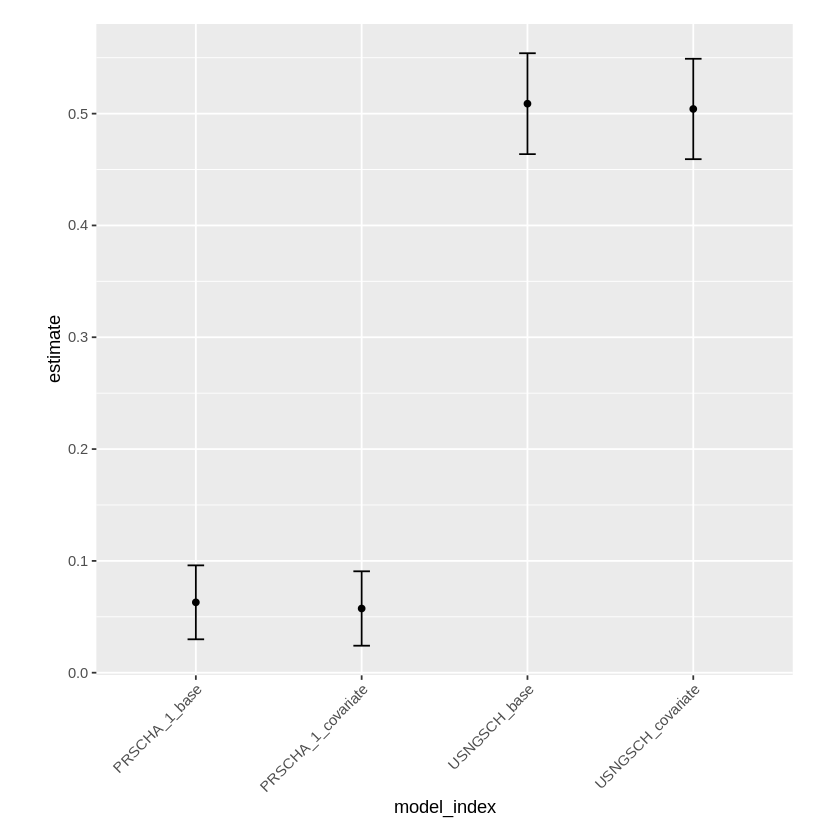

In [27]:
## 通学率と奨学金の利用傾向の可視化(ch2_plot2.png)
### PRSCHA_1, USNGSCHに対するVOUCH0の効果を取り出す
using_voucher_results <- df_results %>%
  filter(term == "VOUCH0",
         str_detect(model_index, "PRSCHA_1|USNGSCH")) %>%
  select(model_index, term, estimate, std.error, p.value) %>%
  arrange(model_index)

### 取り出した効果をggplotで可視化
using_voucher_results %>%
  ggplot(aes(y = estimate, x = model_index)) +
  geom_point() +
  geom_errorbar(aes(ymax = estimate + std.error*1.96,
                    ymin = estimate - std.error*1.96,
                    width = 0.1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        plot.margin = margin(0.5,1,0.5,1, "cm"))

#2.3.4 割引券は留年を減らしているか？

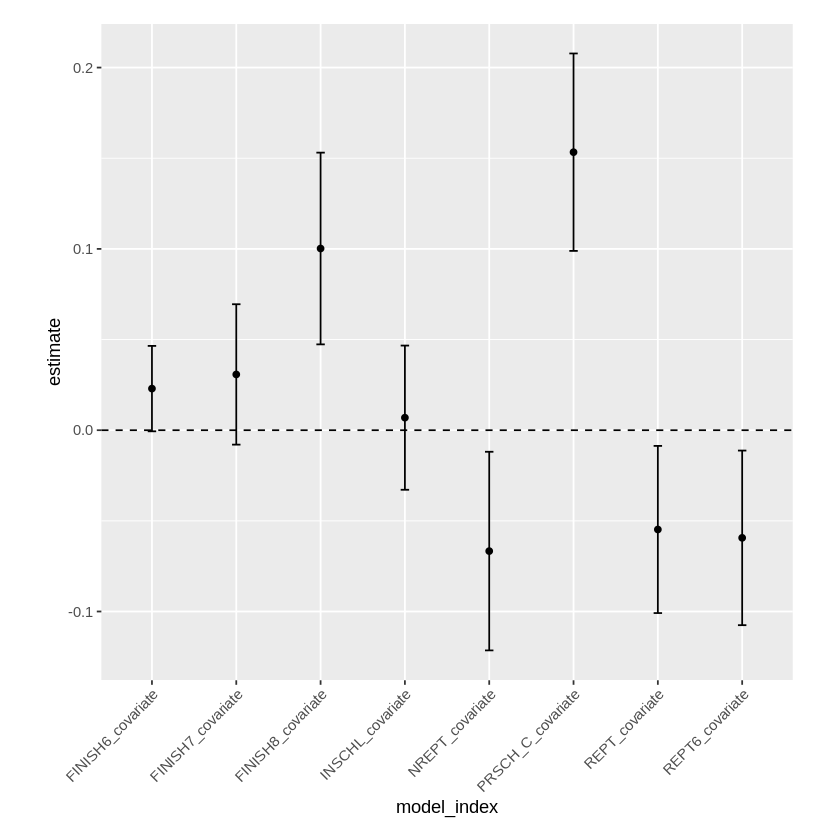

In [28]:
## 留年の傾向を可視化
### PRSCH_C,INSCHL,FINISH6-8,REPTに対するVOUCH0の効果を取り出す
going_private_results <- df_results %>%
  filter(term == "VOUCH0",
         str_detect(model_index, "PRSCH_C|INSCHL|FINISH|REPT")) %>%
  select(model_index, term, estimate, std.error, p.value) %>%
  arrange(model_index)

### 取り出した効果をggplotで可視化
going_private_results %>%
  filter(str_detect(model_index, "covariate")) %>%
  ggplot(aes(y = estimate, x = model_index)) +
  geom_point() +
  geom_errorbar(aes(ymax = estimate + std.error*1.96,
                    ymin = estimate - std.error*1.96,
                    width = 0.1)) +
  geom_hline(yintercept = 0, linetype = 2) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        plot.margin = margin(0.5,1,0.5,1, "cm"))

#2.3.5 性別による効果差

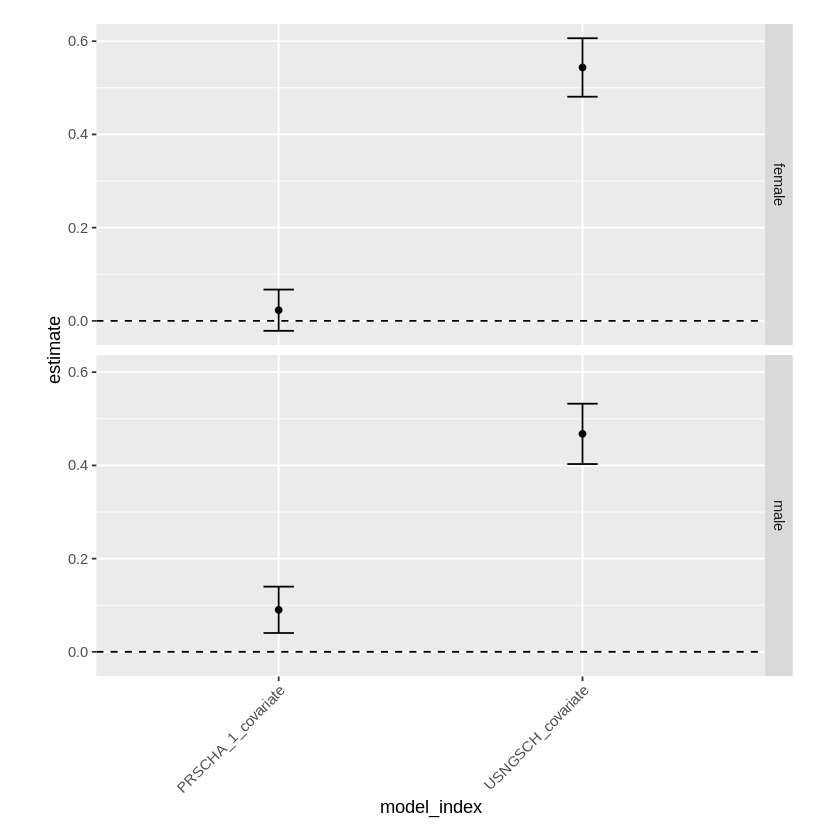

In [29]:
# (4) Angrist(2002)のTable.4 & 6 bogota 1995の再現
## table4に使うデータを抜き出す
data_tbl4_bog95 <- vouchers %>%
  filter(BOG95SMP == 1, TAB3SMPL == 1,
         !is.na(SCYFNSH), !is.na(FINISH6), !is.na(PRSCHA_1),
         !is.na(REPT6), !is.na(NREPT), !is.na(INSCHL),
         !is.na(FINISH7),
         !is.na(PRSCH_C), !is.na(FINISH8), !is.na(PRSCHA_2),
         !is.na(TOTSCYRS), !is.na(REPT)
  ) %>%
  select(VOUCH0, SVY, HSVISIT, DJAMUNDI, PHONE, AGE,
         STRATA1:STRATA6, STRATAMS, DBOGOTA, D1993, D1995, D1997,
         DMONTH1:DMONTH12, SEX_MISS, FINISH6, FINISH7, FINISH8,
         REPT6, REPT, NREPT, SEX2, TOTSCYRS, MARRIED, HASCHILD,
         HOURSUM,WORKING3, INSCHL,PRSCH_C,USNGSCH,PRSCHA_1)

## 女子生徒のみのデータでの回帰分析
### 女子生徒のデータだけ取り出す
regression_data <- data_tbl4_bog95 %>% filter(SEX2 == 0)

### まとめて回帰分析を実行
df_models <- models %>%
  mutate(model = map(.x = formula, .f = lm, data = regression_data)) %>%
  mutate(lm_result = map(.x = model, .f = tidy))

### モデルの結果を整形
df_results_female <- df_models %>%
  mutate(formula = as.character(formula),
         gender = "female") %>%
  select(formula, model_index, lm_result, gender) %>%
  unnest(cols = c(lm_result))

## 男子生徒のみのデータでの回帰分析
regression_data <- data_tbl4_bog95 %>% filter(SEX2 == 1)

### まとめて回帰分析を実行
df_models <- models %>%
  mutate(model = map(.x = formula, .f = lm, data = regression_data)) %>%
  mutate(lm_result = map(.x = model, .f = tidy))

### モデルの結果を整形
df_results_male <- df_models %>%
  mutate(formula = as.character(formula),
         gender = "male") %>%
  select(formula, model_index, lm_result, gender) %>%
  unnest(cols = c(lm_result))

## 通学傾向への分析結果の可視化(ch2_plot3.png)
### PRSCHA_1,USNGSCHに対する分析結果を抜き出す
using_voucher_results_gender <- rbind(df_results_male, df_results_female) %>%
  filter(term == "VOUCH0", str_detect(model_index, "PRSCHA_1|USNGSCH")) %>%
  select(gender, model_index, term, estimate, std.error, p.value) %>%
  arrange(gender, model_index) %>%
  filter(str_detect(model_index, "covariate"))

### ggplotによる可視化
using_voucher_results_gender %>%
  filter(str_detect(model_index, "covariate")) %>%
  ggplot(aes(y = estimate, x = model_index)) +
  geom_point() +
  geom_errorbar(aes(ymax = estimate + std.error*1.96,
                    ymin = estimate - std.error*1.96,
                    width = 0.1)) +
  geom_hline(yintercept = 0, linetype = 2) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        plot.margin = margin(0.5,1,0.5,1, "cm")) +
  facet_grid(gender ~ .)

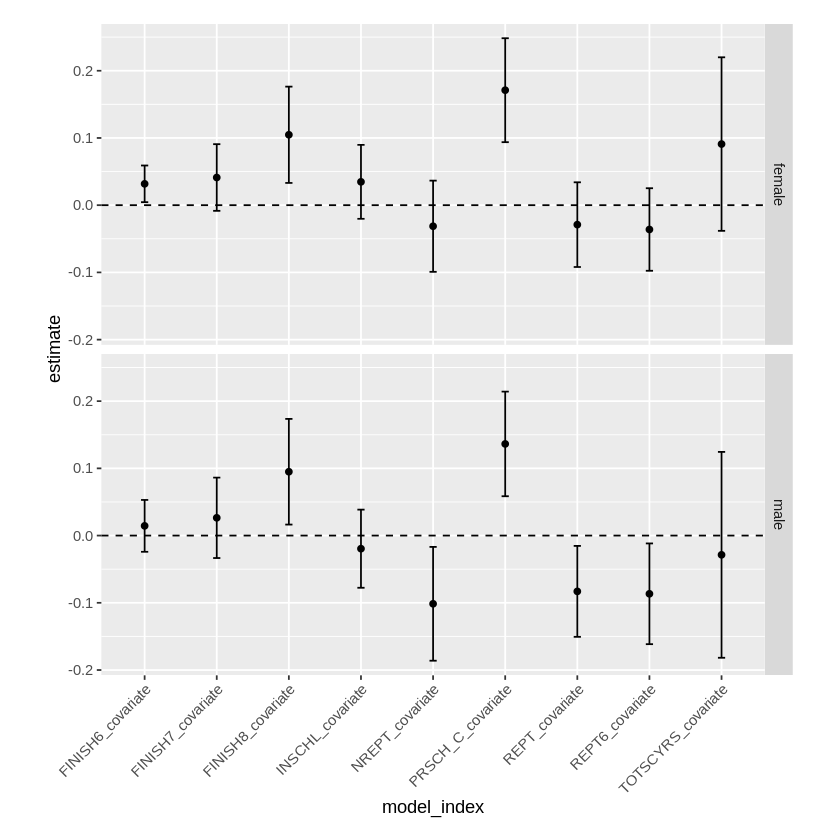

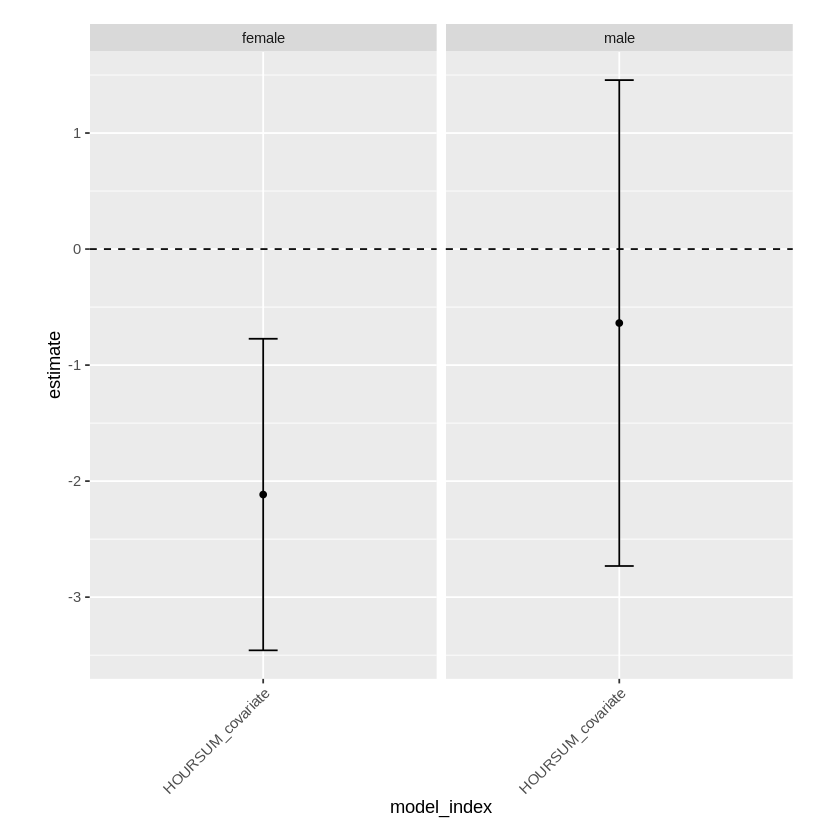

In [30]:
## 留年と通学年数への分析結果の可視化(ch2_plot4.png)
### PRSCH_C,INSCHL,REPT,TOTSCYRS,FINISHに対する分析結果を抜き出す
going_private_results_gender <- rbind(df_results_male, df_results_female) %>%
  filter(term == "VOUCH0",
         str_detect(model_index, "PRSCH_C|INSCHL|REPT|TOTSCYRS|FINISH")) %>%
  select(gender, model_index, term, estimate, std.error, p.value) %>%
  arrange(model_index)

### ggplotによる可視化
going_private_results_gender %>%
  filter(str_detect(model_index, "covariate")) %>%
  ggplot(aes(y = estimate, x = model_index)) +
  geom_point() +
  geom_errorbar(aes(ymax = estimate + std.error*1.96,
                    ymin = estimate - std.error*1.96,
                    width = 0.1)) +
  geom_hline(yintercept = 0, linetype = 2) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        plot.margin = margin(0.5,1,0.5,1, "cm")) +
  facet_grid(gender ~ .)

## 労働時間に対する分析結果の可視化(ch2_plot5.png)
### HOURに対する分析結果を抜き出す
working_hour_results_gender <- rbind(df_results_male, df_results_female) %>%
  filter(term == "VOUCH0", str_detect(model_index, "HOUR")) %>%
  select(gender, model_index, term, estimate, std.error, p.value) %>%
  arrange(gender, model_index)

### ggplotによる可視化
working_hour_results_gender %>%
  filter(str_detect(model_index, "covariate")) %>%
  ggplot(aes(y = estimate, x = model_index)) +
  geom_point() +
  geom_errorbar(aes(ymax = estimate + std.error*1.96,
                    ymin = estimate - std.error*1.96,
                    width = 0.1)) +
  geom_hline(yintercept = 0, linetype = 2) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        plot.margin = margin(0.5,1,0.5,1, "cm")) +
  facet_grid(. ~ gender)

#2.3.6 分析のまとめ


1.   そもそも利用されているか
2.   私立学校への通学が維持されるか
3.   留年に影響するか

